#   IAU Zadanie - III. fáza

### Autori: Peter Brandajsky - 50%, Frederik Duvač - 50%

#### Kedze bolo predosle zadanie chaoticky napisane ohladom toho co mame exportnut, tak sme upravili export kde transformujeme aj testovaci dataset pomocou nasej pipeline. Upraveny kod vyzeral takto:


In [1]:
'''
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, StandardScaler, MinMaxScaler, FunctionTransformer
import pandas as pd

# Definícia stĺpcov
normal_columns = [
    'c.android.gm', 'c.android.chrome', 'c.dogalize', 'c.katana',
    'c.android.youtube', 'p.android.documentsui', 'p.system',
    'p.android.chrome', 'p.android.externalstorage', 'p.android.gm',
    'p.android.packageinstaller'
]
skewed_column = ['p.olauncher']

X_train = train_data.drop(columns=['mwra'])
y_train = train_data['mwra']
X_test = test_data.drop(columns=['mwra'])
y_test = test_data['mwra']

# Krok 1: Quantile Transformácia pre šikmý stĺpec
quantile_transformer = Pipeline(steps=[
    ('transform', make_column_transformer(
        (QuantileTransformer(output_distribution="normal", random_state=42), skewed_column),
        remainder='passthrough')),
    ('to_dataframe', FunctionTransformer(lambda x: pd.DataFrame(x, columns=X_train.columns)))
])

# Krok 2: Power Transformácia pre normálne stĺpce
power_transformer = Pipeline(steps=[
    ('transform', make_column_transformer(
        (PowerTransformer(method='yeo-johnson', standardize=True), normal_columns),
        remainder='passthrough')),
    ('to_dataframe', FunctionTransformer(lambda x: pd.DataFrame(x, columns=X_train.columns)))
])

# Krok 3: Standard Scaling pre normálne stĺpce
standard_scaler = Pipeline(steps=[
    ('transform', make_column_transformer(
        (StandardScaler(), normal_columns),
        remainder='passthrough')),
    ('to_dataframe', FunctionTransformer(lambda x: pd.DataFrame(x, columns=X_train.columns)))
])

# Krok 4: Min-Max Scaling pre šikmý stĺpec
minmax_scaler = Pipeline(steps=[
    ('transform', make_column_transformer(
        (MinMaxScaler(), skewed_column),
        remainder='passthrough')),
    ('to_dataframe', FunctionTransformer(lambda x: pd.DataFrame(x, columns=X_train.columns)))
])

# Vytvorenie hlavnej Pipeline s každým krokom zvlášť
pipeline = Pipeline(steps=[
    ('quantile', quantile_transformer),
    ('power', power_transformer),
    ('scaler', standard_scaler),
    ('minmax', minmax_scaler),
], verbose=True)

# Aplikácia pipeline na trénovacie dáta bez 'mwra'
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Spojenie transformovaných dát s cieľovým stĺpcom 'mwra'
train_transformed = pd.concat([y_train.reset_index(drop=True), X_train_transformed], axis=1)
test_transformed = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(X_test_transformed, columns=X_test.columns)], axis=1)

train_transformed
test_transformed

train_transformed.to_csv('dataset/train_transformed.csv', sep='\t', index=False, encoding='utf-8')
test_transformed.to_csv('dataset/test_transformed.csv', sep='\t', index=False, encoding='utf-8')

train_data.to_csv('dataset/train_data.csv', sep='\t', index=False, encoding='utf-8')
test_data.to_csv('dataset/test_data.csv', sep='\t', index=False, encoding='utf-8')
'''

'\nfrom sklearn.compose import make_column_transformer\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import QuantileTransformer, PowerTransformer, StandardScaler, MinMaxScaler, FunctionTransformer\nimport pandas as pd\n\n# Definícia stĺpcov\nnormal_columns = [\n    \'c.android.gm\', \'c.android.chrome\', \'c.dogalize\', \'c.katana\',\n    \'c.android.youtube\', \'p.android.documentsui\', \'p.system\',\n    \'p.android.chrome\', \'p.android.externalstorage\', \'p.android.gm\',\n    \'p.android.packageinstaller\'\n]\nskewed_column = [\'p.olauncher\']\n\nX_train = train_data.drop(columns=[\'mwra\'])\ny_train = train_data[\'mwra\']\nX_test = test_data.drop(columns=[\'mwra\'])\ny_test = test_data[\'mwra\']\n\n# Krok 1: Quantile Transformácia pre šikmý stĺpec\nquantile_transformer = Pipeline(steps=[\n    (\'transform\', make_column_transformer(\n        (QuantileTransformer(output_distribution="normal", random_state=42), skewed_column),\n        remainder=\'passthrough\'

# Načítanie údajov z datasetu


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

train_data = pd.read_csv('dataset/train_transformed.csv', sep='\t')
test_data = pd.read_csv('dataset/test_transformed.csv', sep='\t')

In [3]:
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())

# Kontrola rozmerov
print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

Train Data:
   mwra  c.android.gm  c.android.chrome  c.dogalize  c.katana  \
0   1.0      0.403027         -1.572328   -1.196035  2.301022   
1   1.0      0.908776          0.707338    1.151811 -0.251835   
2   1.0      0.351158          1.938269   -1.274725  0.809769   
3   0.0      0.325842          0.640564   -0.361116 -0.864497   
4   1.0      0.734380          0.059038   -0.449809 -0.117029   

   c.android.youtube  p.android.documentsui  p.system  p.android.chrome  \
0          -0.703173               0.915003 -0.838687         -1.642949   
1           2.136694               0.416367 -1.502387          0.676350   
2          -0.008190               0.034201 -1.512423          1.091820   
3          -0.427110              -1.567158  0.530647          0.571926   
4          -0.569458               0.434554  0.497189          1.137384   

   p.android.externalstorage  p.android.gm  p.android.packageinstaller  \
0                  -1.695976     -2.154663                   -0.424138  

In [4]:
train_data.describe()

,mwra,c.android.gm,c.android.chrome,c.dogalize,c.katana,c.android.youtube,p.android.documentsui,p.system,p.android.chrome,p.android.externalstorage,p.android.gm,p.android.packageinstaller,p.olauncher
count,11907.000000,11907.000000,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04
mean,0.626522,0.501998,2.028929e-17,-1.581371e-17,3.162742e-17,-2.386975e-18,2.983719e-17,-2.685347e-18,-9.547899e-18,9.547899e-18,-3.580462e-18,-1.641045e-17,2.864370e-17
std,0.483748,0.174433,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,0.000000,0.000000,-8.250101e+00,-2.566519e+00,-3.747457e+00,-2.834789e+00,-2.926061e+00,-2.739135e+00,-2.743906e+00,-3.295124e+00,-2.913980e+00,-3.009567e+00,-2.903089e+00
25%,0.000000,0.374909,-5.331085e-01,-7.061476e-01,-6.904017e-01,-7.120093e-01,-7.333529e-01,-7.427930e-01,-6.788563e-01,-7.034967e-01,-7.109043e-01,-6.794619e-01,-7.157187e-01
50%,1.000000,0.496021,5.903843e-02,2.406279e-02,-4.729727e-02,2.060091e-02,2.744748e-02,3.552965e-02,1.104699e-02,-1.158652e-02,-5.105099e-03,-1.850603e-02,-4.326195e-03
75%,1.000000,0.624946,4.666989e-01,7.005522e-01,6.979867e-01,7.137299e-01,7.145480e-01,7.404522e-01,6.796264e-01,7.001055e-01,7.261543e-01,6.924067e-01,7.231563e-01
max,1.000000,1.000000,1.938269e+00,3.000127e+00,2.315489e+00,2.833192e+00,2.871607e+00,2.999376e+00,2.696656e+00,2.542503e+00,2.794550e+00,2.589904e+00,2.766666e+00


In [5]:
test_data.describe()

,mwra,c.android.gm,c.android.chrome,c.dogalize,c.katana,c.android.youtube,p.android.documentsui,p.system,p.android.chrome,p.android.externalstorage,p.android.gm,p.android.packageinstaller,p.olauncher
count,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000
mean,0.626470,0.511347,0.024020,0.025745,-0.015024,0.036886,-0.008899,-0.011486,0.038201,0.002155,-0.000192,0.014894,-0.000304
std,0.483822,0.177849,1.010466,0.995494,0.992461,1.017747,1.016067,0.970615,1.011245,1.014653,0.983529,0.998040,0.989041
min,0.000000,-0.002998,-4.927564,-2.565571,-3.548448,-2.800601,-2.940977,-2.639229,-2.747525,-3.119693,-2.985954,-2.980247,-2.911208
25%,0.000000,0.379537,-0.495842,-0.660863,-0.677556,-0.666094,-0.753827,-0.698564,-0.638178,-0.706477,-0.686200,-0.683492,-0.687749
50%,1.000000,0.506209,0.059038,0.040588,-0.047297,0.058036,-0.002603,0.017328,0.034836,-0.018579,-0.004476,0.006095,0.017368
75%,1.000000,0.638797,0.495437,0.716173,0.656435,0.742826,0.738715,0.679082,0.729077,0.727785,0.734095,0.694419,0.733685
max,1.000000,1.006502,1.938269,2.902259,2.335016,2.825817,2.882211,2.955397,2.727371,2.566141,2.778743,2.604146,2.746311


In [6]:
# Rozdelenie na atributy a cielovu premennu
X_train = train_data.drop(columns=['mwra'])
y_train = train_data['mwra']

X_test = test_data.drop(columns=['mwra'])
y_test = test_data['mwra']

# Vyber features s top korelaciou z fazy 2 - moznosti: 'all', 'top_3', 'top_5', 'top_9'
selected_features = 'all'

top_3_features = ['p.android.chrome', 'c.katana', 'p.system']
top_5_features = ['p.android.chrome', 'c.katana', 'p.system', 'c.android.chrome', 'p.android.gm']
top_9_features = ['p.android.chrome', 'c.katana', 'p.system', 'c.android.chrome', 'p.android.gm', 'c.android.youtube',
                  'c.dogalize', 'p.android.externalstorage', 'c.android.gm']

# Prisposobenie X_train a X_test podla vyberu
if selected_features == 'all':
    pass  # Vsetky stlpce v X_train a X_test
elif selected_features == 'top_3':
    X_train = X_train[top_3_features]
    X_test = X_test[top_3_features]
elif selected_features == 'top_5':
    X_train = X_train[top_5_features]
    X_test = X_test[top_5_features]
elif selected_features == 'top_9':
    X_train = X_train[top_9_features]
    X_test = X_test[top_9_features]
else:
    raise ValueError("Neznáma možnosť pre výber features: vyberte 'all', 'top_3' alebo 'top_5'.")

# Vystup informacii o pouzitych vlastnostiach
print("Použité features:", X_train.columns)

# Kontrola rozmerov
print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}")

Použité features: Index(['c.android.gm', 'c.android.chrome', 'c.dogalize', 'c.katana',
       'c.android.youtube', 'p.android.documentsui', 'p.system',
       'p.android.chrome', 'p.android.externalstorage', 'p.android.gm',
       'p.android.packageinstaller', 'p.olauncher'],
      dtype='object')
X_train Shape: (11907, 12), y_train Shape: (11907,)
X_test Shape: (2977, 12), y_test Shape: (2977,)


- Pri možnosti all (12 atribútov), čiže všetkych ktoré sme exportli z fazy 2 sme dostali najlepši výsledok.
- Tieto modely sú schopné zohľadniť viac vzorcov a získať lepšie výsledky, čo znamená, že niektoré z týchto pridaných atribútov poskytujú dôležité informácie, ktoré pomáhajú pri rozlíšení medzi triedami.

In [7]:
# Kontrola distribucie tried
print("Distribúcia v trénovacom datasete:")
print(y_train.value_counts(normalize=True))

print("\nDistribúcia v testovacom datasete:")
print(y_test.value_counts(normalize=True))

Distribúcia v trénovacom datasete:
mwra
1.0    0.626522
0.0    0.373478
Name: proportion, dtype: float64

Distribúcia v testovacom datasete:
mwra
1.0    0.62647
0.0    0.37353
Name: proportion, dtype: float64


# 3.1 Jednoduchý klasikátor na základe závislosti v dátach

## 3.1.A Implementácia ID3 klasifikátora

In [8]:
# Rekurzivne rozdelenie dat do podmnozin na zaklade najlepsieho atributu
class DecisionNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value


# Funkcia na vypocet entropie aktualnej datovej mnoziny
def calculate_entropy(y):
    counts = Counter(y)
    total = len(y)
    entropy = -sum((count / total) * np.log2(count / total) for count in counts.values())
    return entropy


# Funkcia na vypocet informacneho zisku pre numericke atributy
def information_gain(X, y, feature):
    parent_entropy = calculate_entropy(y)

    # Pre numericke atributy potrebujeme vypocitat prahove hodnoty
    thresholds = X[feature].sort_values().unique()
    best_gain = 0
    best_threshold = None

    for threshold in thresholds:
        left_y = y[X[feature] <= threshold]
        right_y = y[X[feature] > threshold]

        # Vypocitame vazenu entropiu pre dany prah
        weighted_entropy = (
                (len(left_y) / len(y)) * calculate_entropy(left_y)
                + (len(right_y) / len(y)) * calculate_entropy(right_y)
        )

        gain = parent_entropy - weighted_entropy
        if gain > best_gain:
            best_gain = gain
            best_threshold = threshold

    return best_gain, best_threshold


# Trieda ID3Classifier s podporou numerickych dat
class ID3Classifier:
    def __init__(self, max_depth=2):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, depth=0):
        if len(set(y)) == 1:
            return DecisionNode(value=y.iloc[0])

        if depth == self.max_depth:
            return DecisionNode(value=y.mode()[0])

        # Najdeme najlepsi atribut a prah
        best_feature = None
        best_threshold = None
        best_gain = -1

        for feature in X.columns:
            gain, threshold = information_gain(X, y, feature)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold

        # Ak neexistuje ziadne delenie, vratime list
        if best_feature is None:
            return DecisionNode(value=y.mode()[0])

        node = DecisionNode(feature=best_feature, threshold=best_threshold)
        left_mask = X[best_feature] <= best_threshold
        right_mask = X[best_feature] > best_threshold

        node.left = self.fit(X[left_mask], y[left_mask], depth + 1)
        node.right = self.fit(X[right_mask], y[right_mask], depth + 1)

        return node

    def predict_one(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature] <= node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    def predict(self, X):
        return X.apply(lambda x: self.predict_one(x, self.tree), axis=1)


# Trenovanie ID3 modelu
id3 = ID3Classifier(max_depth=3)
id3.tree = id3.fit(X_train, y_train)

# Predikcia na trenovacej a testovacej mnozine
y_train_pred_id3 = id3.predict(X_train)
y_test_pred_id3 = id3.predict(X_test)

print("Train predikcie:\n", y_train_pred_id3)
print("Test predikcie:\n", y_test_pred_id3)

Train predikcie:
 0        1.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
11902    0.0
11903    0.0
11904    1.0
11905    1.0
11906    0.0
Length: 11907, dtype: float64
Test predikcie:
 0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
2972    0.0
2973    0.0
2974    0.0
2975    1.0
2976    1.0
Length: 2977, dtype: float64


## 3.1.B Vyhodnotenie modelu

In [9]:
print("Výsledky pre trénovaciu množinu:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_id3):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred_id3, average='binary'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred_id3, average='binary'):.4f}")
print("\nPodrobný report:")
print(classification_report(y_train, y_train_pred_id3))

print("\nVýsledky pre testovaciu množinu:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_id3):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_id3, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_id3, average='binary'):.4f}")
print("\nPodrobný report:")
print(classification_report(y_test, y_test_pred_id3))

Výsledky pre trénovaciu množinu:
Accuracy: 0.8653
Precision: 0.8759
Recall: 0.9146

Podrobný report:
              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81      4447
         1.0       0.88      0.91      0.89      7460

    accuracy                           0.87     11907
   macro avg       0.86      0.85      0.85     11907
weighted avg       0.86      0.87      0.86     11907


Výsledky pre testovaciu množinu:
Accuracy: 0.8707
Precision: 0.8826
Recall: 0.9153

Podrobný report:
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1112
         1.0       0.88      0.92      0.90      1865

    accuracy                           0.87      2977
   macro avg       0.87      0.86      0.86      2977
weighted avg       0.87      0.87      0.87      2977



### Interpretácia výsledkov pre max depth 3 a 12 atributov:
1. Presnosť (Accuracy):
    - Trénovacia presnosť: 86.53 %
    - Testovacia presnosť: 87.07 %
    - Obidve sú veľmi dobré a pomerne stabilné medzi trénovacím a testovacím datasetom, čo naznačuje, že model dobre generalizuje.

2. Presnosť (Precision):
    - Trénovacia presnosť: 87.59 %
    - Testovacia presnosť: 88.26 %
    - Vysoká presnosť na oboch množinách znamená, že model minimalizuje počet falošných pozitív (t.j. nesprávne klasifikované pozitívne prípady).

3. Recall (Revokovanie):
    - Trénovacia revokácia: 91.46 %
    - Testovacia revokácia: 91.53 %
    - Model má veľmi vysokú recall hodnotu, čo znamená, že zachytáva väčšinu skutočných pozitívnych prípadov, čo je dôležité pre odhaľovanie malvéru.

4. F1-Score:
    - F1-Score (pre triedu 1.0): 0.89 (trénovacia) a 0.90 (testovacia)
    - F1-Score je veľmi dobrá metrika pre nevyvážené dáta, ako je náš prípad, kde jedna trieda (1.0) je viac zastúpená. Tento výsledok ukazuje, že model má veľmi dobrý kompromis medzi presnosťou a recallom.

5. Macro a weighted average:
    - Macro avg (priemer medzi triedami):
        - Trénovanie: Precision 0.86, Recall 0.85
        - Testovanie: Precision 0.87, Recall 0.86
    - Weighted avg (vážený priemer podľa počtu príkladov v každej triede):
        - Trénovanie: Precision 0.86, Recall 0.87
        - Testovanie: Precision 0.87, Recall 0.87
    - Tieto hodnoty tiež naznačujú, že model je vyvážený medzi oboma triedami, bez výrazných sklonov.

## 3.1.C Overenie overfittingu

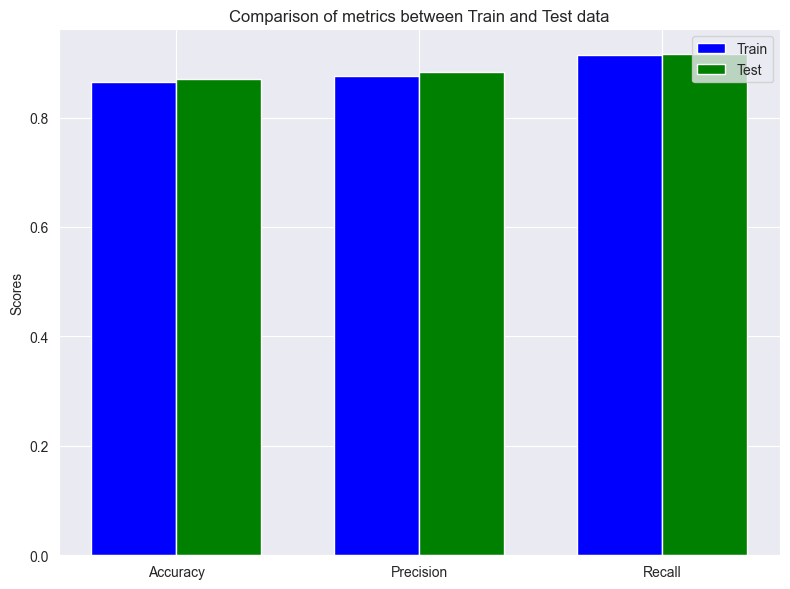

In [10]:
# Metriky pre trenovaciu a testovaciu mnozinu
train_metrics = [accuracy_score(y_train, y_train_pred_id3), precision_score(y_train, y_train_pred_id3),
                 recall_score(y_train, y_train_pred_id3)]
test_metrics = [accuracy_score(y_test, y_test_pred_id3), precision_score(y_test, y_test_pred_id3),
                recall_score(y_test, y_test_pred_id3)]

metrics = ['Accuracy', 'Precision', 'Recall']

x = np.arange(len(metrics))
width = 0.35

ficomp_g, ax = plt.subplots(figsize=(8, 6))

# Stlpce pre trenovaciu a testovaciu mnozinu
rects1 = ax.bar(x - width / 2, train_metrics, width, label='Train', color='b')
rects2 = ax.bar(x + width / 2, test_metrics, width, label='Test', color='g')

# Pridanie popisov, titulkov a zobrazenie
ax.set_ylabel('Scores')
ax.set_title('Comparison of metrics between Train and Test data')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

#### Naše výsledky sú veľmi dobré! Máme vysokú presnosť, recall aj F1-skóre, ktoré naznačujú, že model funguje veľmi dobre na detekciu mwra aktivity. Z interpretácie výsledkov a z grafu vidíme, že metriky sú vyvážené a pre testovaciu množinu sú o niečo lepšie, preto náš model nie je preučený.

# 3.2 Trénovanie a vyhodnotenie klasikátorov strojového učenia

## 3.2.A Trénovanie stromového algoritmu - Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='entropy')

# model training
dt_clf.fit(X_train, y_train)

# prediction on test and train set
y_train_pred_dt = dt_clf.predict(X_train)
y_test_pred_dt = dt_clf.predict(X_test)

# performance evaluation
print("Decision Tree Classifier - Trénovacia množina:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred_dt, average='binary'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred_dt, average='binary'):.4f}")
print("\nPodrobný report:")
print(classification_report(y_train, y_train_pred_dt))

print("Decision Tree Classifier - Testovacia množina:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_dt, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_dt, average='binary'):.4f}")
print("\nPodrobný report:")
print(classification_report(y_test, y_test_pred_dt))

Decision Tree Classifier - Trénovacia množina:
Accuracy: 0.8653
Precision: 0.8759
Recall: 0.9146

Podrobný report:
              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81      4447
         1.0       0.88      0.91      0.89      7460

    accuracy                           0.87     11907
   macro avg       0.86      0.85      0.85     11907
weighted avg       0.86      0.87      0.86     11907

Decision Tree Classifier - Testovacia množina:
Accuracy: 0.8713
Precision: 0.8827
Recall: 0.9164

Podrobný report:
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1112
         1.0       0.88      0.92      0.90      1865

    accuracy                           0.87      2977
   macro avg       0.87      0.86      0.86      2977
weighted avg       0.87      0.87      0.87      2977



## 3.2.B Trénovanie nestromového algoritmu - Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42, max_iter=1000)

# model training
lr_clf.fit(X_train, y_train)

# prediction on test and train set
y_train_pred_lr = lr_clf.predict(X_train)
y_test_pred_lr = lr_clf.predict(X_test)

# performance evaluation
print("Logistic Regression - Trénovacia množina")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_lr):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred_lr, average='binary'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred_lr, average='binary'):.4f}")
print("\nPodrobný report:")
print(classification_report(y_train, y_train_pred_lr))

print("Logistic Regression - Testovacia množina")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_lr, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_lr, average='binary'):.4f}")
print("\nPodrobný report:")
print(classification_report(y_test, y_test_pred_lr))

Logistic Regression - Trénovacia množina
Accuracy: 0.9055
Precision: 0.9092
Recall: 0.9434

Podrobný report:
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      4447
         1.0       0.91      0.94      0.93      7460

    accuracy                           0.91     11907
   macro avg       0.90      0.89      0.90     11907
weighted avg       0.91      0.91      0.90     11907

Logistic Regression - Testovacia množina
Accuracy: 0.9177
Precision: 0.9219
Recall: 0.9491

Podrobný report:
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89      1112
         1.0       0.92      0.95      0.94      1865

    accuracy                           0.92      2977
   macro avg       0.92      0.91      0.91      2977
weighted avg       0.92      0.92      0.92      2977



## 3.2.C Porovnanie s ID3 klasifikátorom na základe Classification Report pre jednotlive triedy 0 a 1

- Pre triedu 1 (pozitívnu) všetky modely dosahujú veľmi podobné výsledky, Logistic Regression disponuje mierne lepším výkonom.
- Pre triedu 0 (negatívnu) Logistic Regression opäť vykazuje lepšie výsledky, najmä čo sa týka precision.

- Toto porovnanie ukazuje, že Logistic Regression má lepší výkon na oboch triedach v porovnaní s ID3 a Decision Tree. ID3 a Decision Tree majú podobné výsledky, ale Logistic Regression je silnejší vo väčšine metrikách.

#### Podrobnejšie metriky a vizualizácia je v bode 3.2.5

## 3.2.D Vizualizácia pravidiel stromového modelu a Logistic Regression

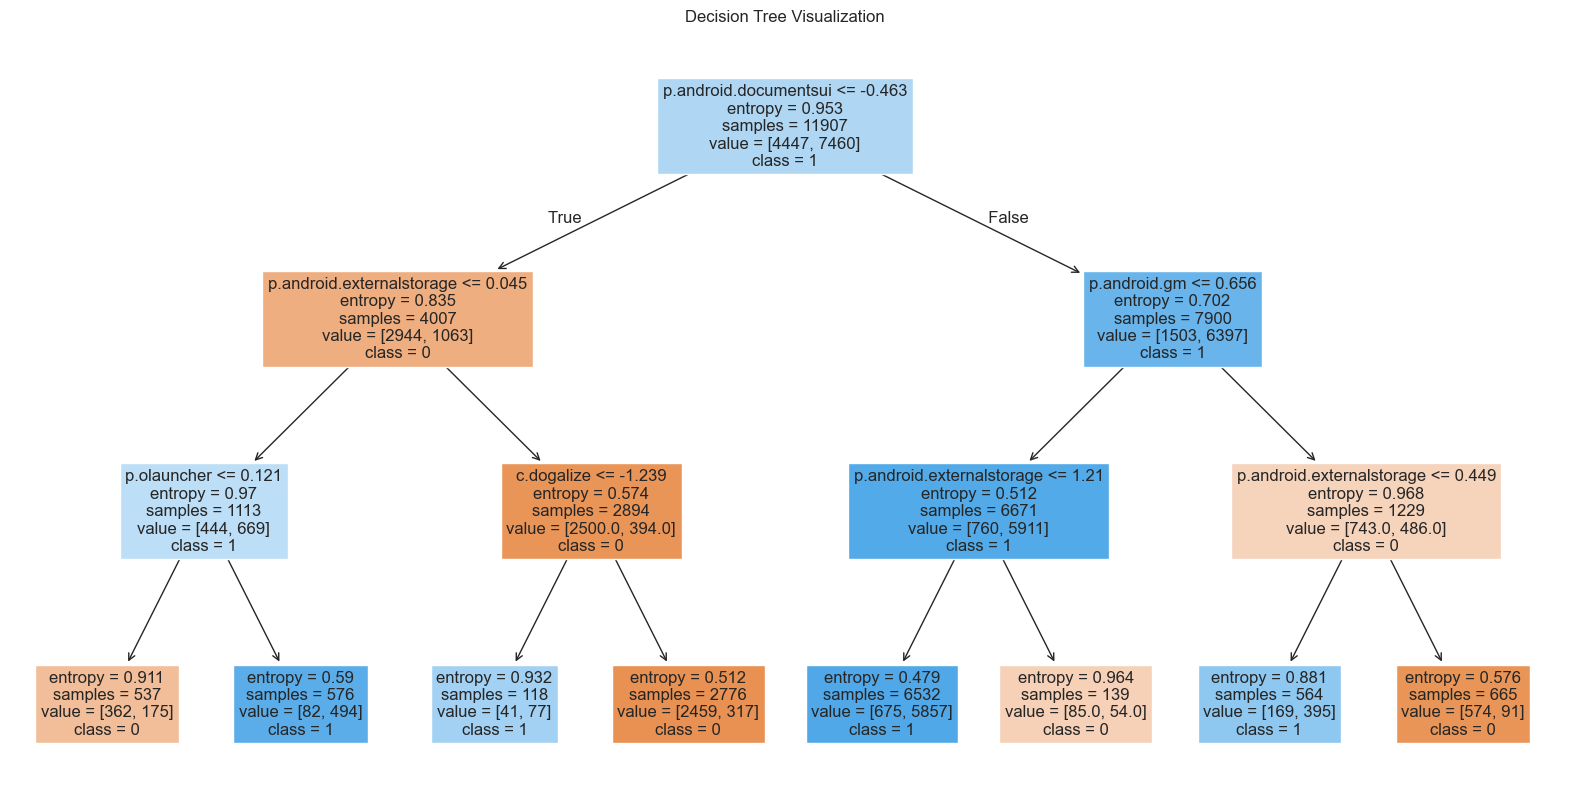

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(dt_clf, filled=True, feature_names=X_train.columns, class_names=['0', '1'], fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()

#### Niektoré vlastnosti, ako documentsui, externalstorage, alebo gm, majú veľký vplyv na rozhodovanie modelu. Sú na vyšších úrovniach stromu, pretože najlepšie rozlišujú medzi triedami.

<Figure size 1000x600 with 0 Axes>

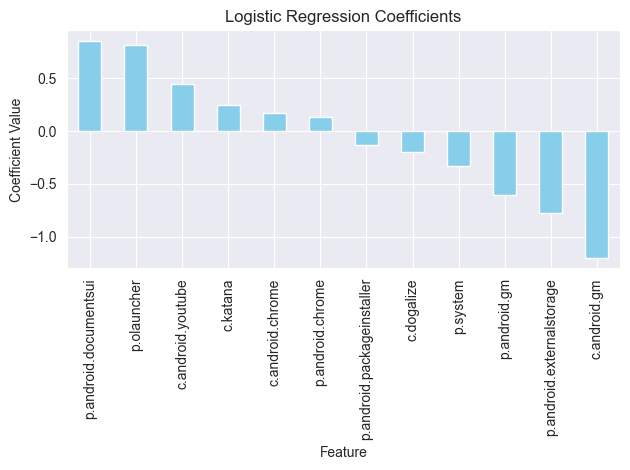

In [14]:
# coefficient extraction a sort by influence
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_clf.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# coefficient visualisation
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar', x='Feature', y='Coefficient', legend=False, color='skyblue')
plt.title('Logistic Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

## 3.2.E Vyhodnotenie pomocou Accuracy, Precision, Recall

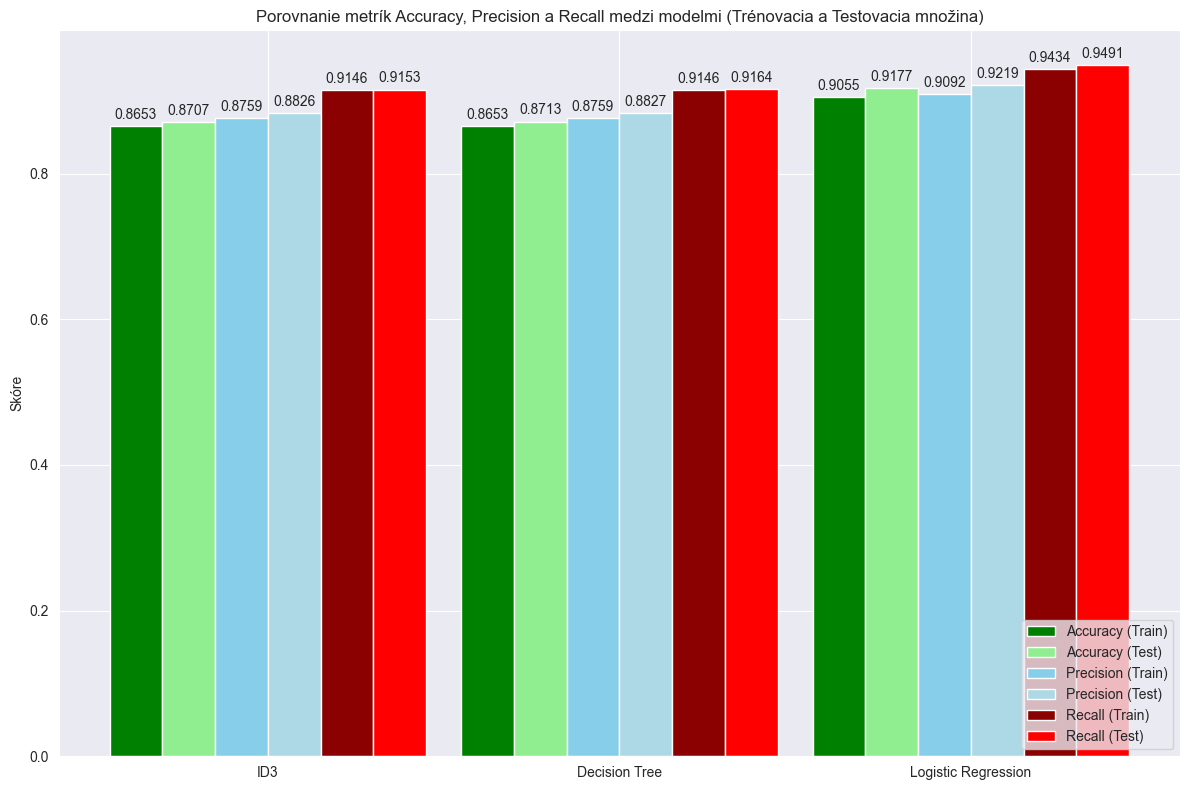

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Metriky pre každý model
metrics_train = {
    'Model': ['ID3', 'Decision Tree', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_train, y_train_pred_id3),
        accuracy_score(y_train, y_train_pred_dt),
        accuracy_score(y_train, y_train_pred_lr)
    ],
    'Precision': [
        precision_score(y_train, y_train_pred_id3),
        precision_score(y_train, y_train_pred_dt),
        precision_score(y_train, y_train_pred_lr)
    ],
    'Recall': [
        recall_score(y_train, y_train_pred_id3),
        recall_score(y_train, y_train_pred_dt),
        recall_score(y_train, y_train_pred_lr)
    ]
}

metrics_test = {
    'Accuracy': [
        accuracy_score(y_test, y_test_pred_id3),
        accuracy_score(y_test, y_test_pred_dt),
        accuracy_score(y_test, y_test_pred_lr)
    ],
    'Precision': [
        precision_score(y_test, y_test_pred_id3),
        precision_score(y_test, y_test_pred_dt),
        precision_score(y_test, y_test_pred_lr)
    ],
    'Recall': [
        recall_score(y_test, y_test_pred_id3),
        recall_score(y_test, y_test_pred_dt),
        recall_score(y_test, y_test_pred_lr)
    ]
}

# Pretransformovanie do DataFrame
metrics_train_df = pd.DataFrame(metrics_train)
metrics_test_df = pd.DataFrame(metrics_test)

# Vizualizácia všetkých metrík pre trénovacie a testovacie dáta
models = ['ID3', 'Decision Tree', 'Logistic Regression']
metrics = ['Accuracy', 'Precision', 'Recall']

# Nastavenie pre graf
x = np.arange(len(models))
width = 0.15

# Vytvorenie grafu
comp_fig, ax = plt.subplots(figsize=(12, 8))

# Stĺpce
comp_rects1 = ax.bar(x - 2 * width, metrics_train_df['Accuracy'], width, label='Accuracy (Train)', color='green')
comp_rects2 = ax.bar(x - width, metrics_test_df['Accuracy'], width, label='Accuracy (Test)', color='lightgreen')
comp_rects3 = ax.bar(x, metrics_train_df['Precision'], width, label='Precision (Train)', color='skyblue')
comp_rects4 = ax.bar(x + width, metrics_test_df['Precision'], width, label='Precision (Test)', color='lightblue')
comp_rects5 = ax.bar(x + 2 * width, metrics_train_df['Recall'], width, label='Recall (Train)', color='darkred')
comp_rects6 = ax.bar(x + 3 * width, metrics_test_df['Recall'], width, label='Recall (Test)', color='red')

# Pridanie názvov a popisov
ax.set_ylabel('Skóre')
ax.set_title('Porovnanie metrík Accuracy, Precision a Recall medzi modelmi (Trénovacia a Testovacia množina)')
ax.set_xticks(x + width * 0.5)
ax.set_xticklabels(models)
ax.legend(loc='lower right')


# Funkcia pre pridanie hodnôt na stĺpce
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.4f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


# Pridanie hodnôt na stĺpce
add_labels(comp_rects1)
add_labels(comp_rects2)
add_labels(comp_rects3)
add_labels(comp_rects4)
add_labels(comp_rects5)
add_labels(comp_rects6)

# Zobrazenie grafu
plt.tight_layout()
plt.show()

### Výstup:

Z výstupov môžeme vidieť, že Logistic Regression dosiahol najvyššiu presnosť a recall na trénovacej aj testovacej množine. Tento model je najpresnejší a má lepšiu schopnosť zachytiť pozitívne vzory (vysoký recall).

ID3 a Decision Tree majú veľmi podobné výsledky, čo naznačuje, že Decision Tree model (ktorý je optimalizovaný v rámci scikit-learn) poskytuje porovnateľné alebo lepšie výsledky než ručne implementovaný ID3 model. Avšak, medzi ID3 a Decision Tree nie sú výrazné rozdiely, keďže oba modely sú v podstate rozhodovacími stromami.

#### 1. ID3:

- Funguje ako základný model, ktorý má stabilné výsledky, ale mierne zaostáva oproti ostatným modelom.
- Precision, recall a F1-score sú rovnaké pre Decision Tree, čo indikuje podobnú štruktúru.

#### 2. Decision Tree:

- Zlepšenie oproti ID3 v testovacej množine, ale rozdiel je minimálny.
- Lepšia flexibilita algoritmu nevedie k dramatickému zlepšeniu presnosti.

#### 3. Logistic Regression:

- Najvyššie výsledky pre všetky metriky (precision, recall, F1-score) v testovacej množine.
- Model má výhodu v tom, že je vhodný pre tento typ úlohy.

# 3.3 Optimalizácia alias hyperparameter tuning

## 3.3.A

## 3.3.B

## 3.3.C

## 3.3.D

# 3.4 Vyhodnotenie vplyvu zvolenej stratégie riešenia na klasikáciu

## 3.4.A

## 3.4.B

## 3.4.C

## 3.4.D

## 3.4.E